<a href="https://colab.research.google.com/github/syedabusafwan/syedabusafwan/blob/practice/dr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [2]:

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 7, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [3]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-2019-data

Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-2019-data
License(s): CC0-1.0
 98% 233M/238M [00:02<00:00, 120MB/s]
100% 238M/238M [00:02<00:00, 105MB/s]


In [4]:
!unzip '/content/diabetic-retinopathy-224x224-2019-data.zip' -d '/content'

Archive:  /content/diabetic-retinopathy-224x224-2019-data.zip
  inflating: /content/colored_images/Mild/0024cdab0c1e.png  
  inflating: /content/colored_images/Mild/00cb6555d108.png  
  inflating: /content/colored_images/Mild/0124dffecf29.png  
  inflating: /content/colored_images/Mild/01b3aed3ed4c.png  
  inflating: /content/colored_images/Mild/0369f3efe69b.png  
  inflating: /content/colored_images/Mild/03e25101e8e8.png  
  inflating: /content/colored_images/Mild/04ac765f91a1.png  
  inflating: /content/colored_images/Mild/059bc89df7f4.png  
  inflating: /content/colored_images/Mild/05a5183c92d0.png  
  inflating: /content/colored_images/Mild/0684311afdfc.png  
  inflating: /content/colored_images/Mild/06b71823f9cd.png  
  inflating: /content/colored_images/Mild/07929d32b5b3.png  
  inflating: /content/colored_images/Mild/07a1c7073982.png  
  inflating: /content/colored_images/Mild/086d41d17da8.png  
  inflating: /content/colored_images/Mild/09935d72892b.png  
  inflating: /content/c

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random, os
import cv2
import shutil
from tensorflow import lite
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib.image import imread
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.metrics import categorical_accuracy
import math

In [6]:
# Assuming your CSV file is named 'data.csv' and located inside the 'colored_images' directory
df = pd.read_csv('/content/train.csv')

diagnosis_dict_binary = {
    0: 'No_DR',
    1: 'DR',
    2: 'DR',
    3: 'DR',
    4: 'DR'
}
diagnosis_dict = {
    0: 'No_DR',
    1: 'Mild',
    2: 'Moderate',
    3: 'Severe',
    4: 'Proliferate_DR',
}

df['binary_type'] = df['diagnosis'].map(diagnosis_dict_binary.get)
df['type'] = df['diagnosis'].map(diagnosis_dict.get)
df.head() # Use dataFolder instead of df

,id_code,diagnosis,binary_type,type
0,000c1434d8d7,2,DR,Moderate
1,001639a390f0,4,DR,Proliferate_DR
2,0024cdab0c1e,1,DR,Mild
3,002c21358ce6,0,No_DR,No_DR
4,005b95c28852,0,No_DR,No_DR


<Axes: ylabel='type'>

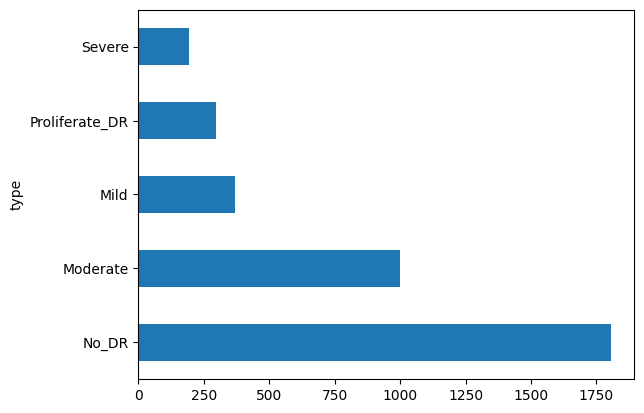

In [7]:
df['type'].value_counts().plot(kind='barh')

In [8]:
ROOT_DIR = "/content/colored_images"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('No_DR', 1805), ('Moderate', 999), ('Proliferate_DR', 295), ('Severe', 193), ('Mild', 370)])

In [9]:
if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)

    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                size= (math.floor(70/100*number_of_images[dir])- 5),
                                replace=False):
      O = os.path.join(ROOT_DIR,dir,img)
      D = os.path.join("./train", dir)
      shutil.copy(O,D)
      os.remove(O)
else:
      print("Train Folder Exsist")


In [10]:
import os
import shutil
import numpy as np
import math

ROOT_DIR = "/content/colored_images"

def dataFolder(p, split):
  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    # Calculate number of images for each directory
    number_of_images = {}  # Initialize the dictionary
    for dir in os.listdir(ROOT_DIR):
        number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)

      for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR, dir)),
                                size=(math.floor(split * number_of_images[dir]) - 5),
                                replace=False):
        O = os.path.join(ROOT_DIR,dir,img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
      print("Folder Exists")

In [11]:
dataFolder("train",0.7)

Folder Exists


In [12]:
dataFolder("val", 0.15)

In [13]:
dataFolder("test", 0.15)

In [14]:
# prompt: print train test val dataset valuencount

train_dir = '/content/train'
val_dir = '/content/val'
test_dir = '/content/test'

def count_images_in_folders(directory):
  counts = {}
  for folder in os.listdir(directory):
    folder_path = os.path.join(directory, folder)
    if os.path.isdir(folder_path):
      counts[folder] = len(os.listdir(folder_path))
  return counts

train_counts = count_images_in_folders(train_dir)
val_counts = count_images_in_folders(val_dir)
test_counts = count_images_in_folders(test_dir)

print("Train dataset value counts:\n", train_counts)
print("\nValidation dataset value counts:\n", val_counts)
print("\nTest dataset value counts:\n", test_counts)


Train dataset value counts:
 {'No_DR': 1258, 'Moderate': 694, 'Proliferate_DR': 201, 'Severe': 130, 'Mild': 254}

Validation dataset value counts:
 {'No_DR': 77, 'Moderate': 40, 'Proliferate_DR': 9, 'Severe': 4, 'Mild': 12}

Test dataset value counts:
 {'No_DR': 65, 'Moderate': 34, 'Proliferate_DR': 7, 'Severe': 3, 'Mild': 10}


In [15]:
train_path = 'train'
val_path = 'val'
test_path = 'test'

train_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(train_path,
                                                                         target_size=(224,224), shuffle = True)
val_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(val_path,
                                                                       target_size=(224,224), shuffle = True)
test_batches = ImageDataGenerator(rescale = 1./255).flow_from_directory(test_path,
                                                                        target_size=(224,224), shuffle = False)

Found 2537 images belonging to 5 classes.
Found 142 images belonging to 5 classes.
Found 119 images belonging to 5 classes.


In [16]:
# prompt: make a model for 5 class

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 output classes for DR severity

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()
history2 = model.fit(train_batches,
                    epochs=15,
                    validation_data=val_batches)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,437,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,681,093 (36.93 MB)

 Trainable params: 9,681,093 (36.93 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 184ms/step - accuracy: 0.5984 - loss: 1.0742 - val_accuracy: 0.8028 - val_loss: 0.6259
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 27s 98ms/step - accuracy: 0.7259 - loss: 0.7558 - val_accuracy: 0.7958 - val_loss: 0.6717
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.7334 - loss: 0.7359 - val_accuracy: 0.7887 - val_loss: 0.5693
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.7460 - loss: 0.7234 - val_accuracy: 0.7817 - val_loss: 0.5699
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.7472 - loss: 0.6944 - val_accuracy: 0.8099 - val_loss: 0.5986
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - accuracy: 0.7592 - loss: 0.6761 - val_accuracy: 0.8099 - val_loss: 0.5951
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.7706 - loss: 0.6372 - val_accuracy: 0.8028 - val_loss: 0.5497
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.7968 - loss: 0.5648 - val_accuracy: 0.8028 - val_l

In [17]:
model = tf.keras.Sequential([
    layers.Conv2D(8, (3,3), padding="valid", input_shape=(224,224,3), activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(16, (3,3), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(32, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Conv2D(64, (4,4), padding="valid", activation = 'relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dropout(0.15),
    layers.Dense(5, activation = 'softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-5), # use learning_rate instead of lr
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['acc'])

history1 = model.fit(train_batches,
                    epochs=15,
                    validation_data=val_batches)

Epoch 1/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 166ms/step - acc: 0.4446 - loss: 0.5176 - val_acc: 0.5423 - val_loss: 0.5219
Epoch 2/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - acc: 0.6712 - loss: 0.3140 - val_acc: 0.5563 - val_loss: 0.4770
Epoch 3/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 12s 143ms/step - acc: 0.7093 - loss: 0.2822 - val_acc: 0.5282 - val_loss: 0.4582
Epoch 4/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - acc: 0.7121 - loss: 0.2763 - val_acc: 0.6479 - val_loss: 0.4090
Epoch 5/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - acc: 0.7179 - loss: 0.2642 - val_acc: 0.7324 - val_loss: 0.3358
Epoch 6/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - acc: 0.7437 - loss: 0.2482 - val_acc: 0.7746 - val_loss: 0.2699
Epoch 7/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - acc: 0.7336 - loss: 0.2557 - val_acc: 0.7746 - val_loss: 0.2335
Epoch 8/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - acc: 0.7253 - loss: 0.2522 - val_acc: 0.7958 - val_loss: 0.2147
Epoch 9/15
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - acc: 0